<div style="text-align: right"> Tommy Evans-Barton </div>
<div style="text-align: right"> GM Draft Analysis </div>

# Analysis of Executive's Draft Data (Brett Veach)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import requests
import urllib
import re
import sys
from glob import glob

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
TOP_PATH = os.environ['PWD']

In [5]:
sys.path.append(TOP_PATH + '/config')
sys.path.append(TOP_PATH + '/src')
sys.path.append(TOP_PATH + '/src/data')
sys.path.append(TOP_PATH + '/src/processing')
sys.path.append(TOP_PATH + '/src/visualization')

In [6]:
import etl
import processing
import viz

## Reading in of Data

In [7]:
all_draft = processing.combine_and_clean_all_drafts()

In [8]:
curr_execs = processing.combine_drafts_and_executives()

In [9]:
curr_execs.head()

,GM,YEAR,Rnd,Pick,Tm,Player,Pos,Age,Played To,AP1,...,Sk,College/Univ,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
0,Les Snead,2012,1,14,Rams,Michael Brockers,DT,21.0,2019.0,0,...,23.0,LSU,77.0,322.0,5.31,26.5,NaN,105.0,7.46,4.81
1,Les Snead,2012,2,33,Rams,Brian Quick,WR,23.0,2018.0,0,...,0.0,Appalachian State,75.0,220.0,4.50,34.0,15.0,119.0,7.10,4.23
2,Les Snead,2012,2,39,Rams,Janoris Jenkins,DB,23.0,2019.0,0,...,2.0,North Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Les Snead,2012,2,50,Rams,Isaiah Pead,RB,22.0,2016.0,0,...,0.0,Cincinnati,70.0,197.0,4.39,33.0,NaN,116.0,6.95,4.32
4,Les Snead,2012,3,65,Rams,Trumaine Johnson,DB,22.0,2019.0,0,...,0.0,Montana,74.0,204.0,4.50,35.5,19.0,122.0,7.20,4.15


## Rick Spielman

In [36]:
rick_spielman = curr_execs[curr_execs['GM'] == 'Rick Spielman'].reset_index(drop = True)
rick_spielman

,GM,YEAR,Rnd,Pick,Tm,Player,Pos,Age,Played To,AP1,...,Sk,College/Univ,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
0,Rick Spielman,2010,2,34,Vikings,Chris Cook,DB,23.0,2014.0,0,...,1.0,Virginia,74.0,212.0,4.45,38.0,7.0,132.0,6.88,4.23
1,Rick Spielman,2010,2,51,Vikings,Toby Gerhart,RB,23.0,2015.0,0,...,0.0,Stanford,72.0,231.0,4.50,38.0,22.0,118.0,6.94,4.25
2,Rick Spielman,2010,4,100,Vikings,Everson Griffen,DE,22.0,2019.0,0,...,74.5,USC,75.0,273.0,4.65,NaN,32.0,NaN,NaN,NaN
3,Rick Spielman,2010,5,161,Vikings,Chris DeGeare,G,23.0,2012.0,0,...,0.0,Wake Forest,76.0,325.0,5.12,32.5,27.0,103.0,7.84,4.90
4,Rick Spielman,2010,5,167,Vikings,Nate Triplett,LB,23.0,2011.0,0,...,0.0,Minnesota,75.0,250.0,4.70,33.0,20.0,115.0,7.02,4.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Rick Spielman,2020,6,205,Vikings,Josh Metellus,S,NaN,NaN,0,...,0.0,Michigan,71.0,209.0,4.55,36.5,20.0,124.0,6.94,4.40
107,Rick Spielman,2020,7,225,Vikings,Kenny Willekes,DE,NaN,NaN,0,...,0.0,Michigan State,75.0,264.0,4.87,32.5,32.0,119.0,7.39,NaN
108,Rick Spielman,2020,7,244,Vikings,Nate Stanley,QB,NaN,NaN,0,...,0.0,Iowa,76.0,235.0,4.81,28.5,NaN,108.0,7.26,4.48
109,Rick Spielman,2020,7,249,Vikings,Brian Cole II,S,NaN,NaN,0,...,0.0,Mississippi State,74.0,213.0,4.52,NaN,NaN,NaN,NaN,NaN


## Picks by Round

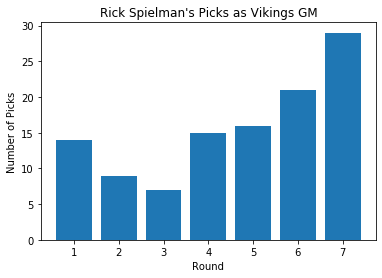

In [50]:
viz.picks_by_round('Rick Spielman')

## Picks by Position

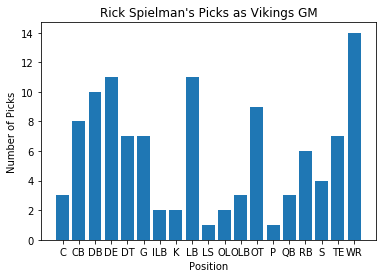

In [38]:
viz.picks_by_position('Rick Spielman')

## Picks by Year

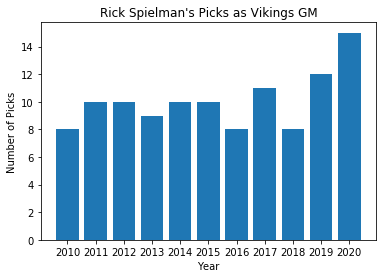

In [39]:
viz.picks_by_year('Rick Spielman')

In [33]:
all_draft.pivot_table('Player', 'Rnd', 'Pos', aggfunc = 'count').fillna(0)

Pos,C,CB,DB,DE,DT,FB,G,ILB,K,LB,...,NT,OL,OLB,OT,P,QB,RB,S,TE,WR
Rnd,,,,,,,,,,,,,,,,,,,,,
1,8.0,24.0,31.0,44.0,35.0,0.0,15.0,4.0,0.0,25.0,...,1.0,0.0,9.0,44.0,0.0,34.0,17.0,11.0,9.0,40.0
2,9.0,31.0,23.0,29.0,28.0,0.0,14.0,4.0,1.0,33.0,...,2.0,1.0,11.0,29.0,0.0,11.0,32.0,21.0,20.0,50.0
3,10.0,24.0,38.0,36.0,44.0,0.0,25.0,4.0,0.0,33.0,...,0.0,6.0,12.0,30.0,1.0,13.0,30.0,17.0,27.0,49.0
4,11.0,24.0,38.0,33.0,27.0,1.0,31.0,7.0,1.0,37.0,...,1.0,3.0,8.0,22.0,1.0,18.0,46.0,22.0,28.0,52.0
5,6.0,21.0,50.0,38.0,21.0,1.0,28.0,3.0,7.0,47.0,...,4.0,4.0,8.0,23.0,8.0,14.0,32.0,15.0,22.0,46.0
6,13.0,28.0,38.0,25.0,29.0,8.0,19.0,6.0,5.0,40.0,...,1.0,13.0,10.0,27.0,5.0,20.0,40.0,20.0,23.0,58.0
7,10.0,21.0,53.0,52.0,37.0,3.0,14.0,6.0,7.0,43.0,...,2.0,13.0,11.0,25.0,5.0,20.0,41.0,12.0,29.0,53.0


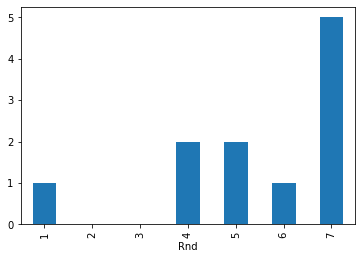

In [48]:
rick_spielman.pivot_table('Player', 'Rnd', 'Pos', aggfunc = 'count').fillna(0).LB.plot(kind = 'bar')